In [1]:
import numpy as np
np.bool = np.bool_
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib as mt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import sys
sys.path.append('../../0_python_modules/')
import msm_analysis as ana
import idp_analysis as idp

In [2]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,70+1,5)
n_pcca = np.array([2, 3, 4, 5, 6])

In [3]:
def get_msm_labels(diff, nc, ml, npc):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                out.append([ nc[i], ml[j], npc[k], diff[i,j,k] ])
    return np.array(out)

In [4]:
def get_frames(mdis, dtrj, stds, 
               microstate='large',):
    frames = []
    for a,macro in enumerate(mdis):
        if microstate=='large':
            micro = macro[ stds[macro].argmax() ]
        else:
            micro = macro[ stds[macro].argmin() ]
            
        nframes = np.where(dtrj==micro)
        frames.append(nframes[0])
        
    return frames

def write_frames(pdb, trajs, idata,
                 fid, nconfs=10, otype='random', sel='all', sel2='all',
                ofmt='pdb', opath='./', oname='frame'):
    
    uni = mda.Universe(f'{pdb}', f'{trajs}')
    
    dd = idata[fid]
    
    if otype=='random':
        np.random.seed(0)
        oframes = np.random.choice(fid, nconfs)
    elif otype == 'min':
        oframes = fid[dd.argsort()[:nconfs]]
    elif otype == 'max':
        oframes = fid[dd.argsort()[::-1][:nconfs]]
    elif otype == 'variable':
        oframes = fid[dd.argsort()[::int(len(fid)/nconfs)][:nconfs]]
    else:
        raise ValueError(f'{otype} not in [random, variable, min, max]')
        
    for a,i in enumerate(oframes):
        uni.trajectory[i]
        aa = uni.select_atoms(f'{sel}')
        aa = aa.translate(-uni.select_atoms(sel2).center_of_mass())
        aa.write(f'{opath}{oname}{a}.{ofmt}')

In [5]:
colors = np.array(['salmon', 'dodgerblue', 'teal', 'limegreen', 'sienna', 'violet'])
cmaps = [mt.colors.LinearSegmentedColormap.from_list('', colors[:i], N=i) for i in range(2, 7)]

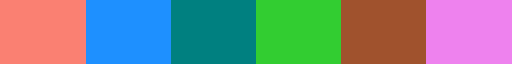

In [6]:
cmaps[4]

In [7]:
trajs = '../../1_datasets/idp_rg/pnas2018b-asyn-a99SBdisp-extended-protein-combined.xtc'
pdb = '../../1_datasets/idp_rg/DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb'

In [8]:
idata1 = np.loadtxt('../../1_datasets/idp_rg/rg_system.xvg', comments=['@','#'])[:,1]
idata2 = np.loadtxt('../../1_datasets/idp_rg/dist_ca_10-130.xvg', comments=['@','#'])[:,1]

In [9]:
durf = np.load('urf/saved_fdiffs/cmean_strict.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==3]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [20.  5.  3. 24.]
1 [500.  45.   3.  25.]
2 [20.    5.    3.   22.33]
3 [350.  55.   3.  25.]
4 [1000.     10.      3.     31.33]


In [10]:
durf = np.load('urf/saved_dbi/dbi.npy')
for i in range(5):
    d1 = get_msm_labels(durf[i], n_clus, msm_lags, n_pcca)
    d1 = d1[d1[:,2]==3]
    print(i, np.round(d1[d1[:,3].argmax()], 2) )

0 [50.  40.   3.   1.9]
1 [30.    5.    3.    2.15]
2 [50.   15.    3.    2.27]
3 [30.    5.    3.    2.19]
4 [20.    5.    3.    2.08]


## i=4, cl=1000, ml=10, pc=3

In [12]:
i=4
cl = 1000
ml = 10
pc = 3

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([  1,   7,  11,  20,  22,  34,  37,  45,  49,  52,  59,  64,  66,
         67,  69,  71,  74,  83,  89, 102, 113, 117, 118, 122, 125, 127,
        135, 139, 140, 152, 164, 172, 176, 178, 181, 186, 188, 199, 201,
        212, 216, 217, 218, 223, 232, 235, 236, 239, 240, 257, 260, 280,
        282, 293, 301, 304, 309, 312, 314, 338, 345, 352, 364, 366, 369,
        374, 376, 379, 383, 386, 390, 392, 393, 396, 397, 405, 408, 415,
        429, 438, 439, 442, 443, 446, 448, 454, 455, 461, 465, 466, 477,
        481, 491, 492, 496, 499, 501, 509, 513, 517, 534, 538, 545, 553,
        559, 565, 576, 582, 583, 587, 589, 591, 614, 624, 626, 628, 631,
        643, 648, 658, 660, 664, 671, 674, 680, 701, 703, 709, 714, 716,
        720, 728, 730, 735, 738, 745, 751, 753, 761, 764, 765, 768, 769,
        777, 778, 784, 785, 787, 793, 795, 798, 802, 807, 811, 813, 814,
        823, 832, 833, 837, 843, 858, 861, 867, 868, 870, 871, 874, 883,
        888, 889, 895, 899, 902, 911, 925, 926, 928

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.75it/s]


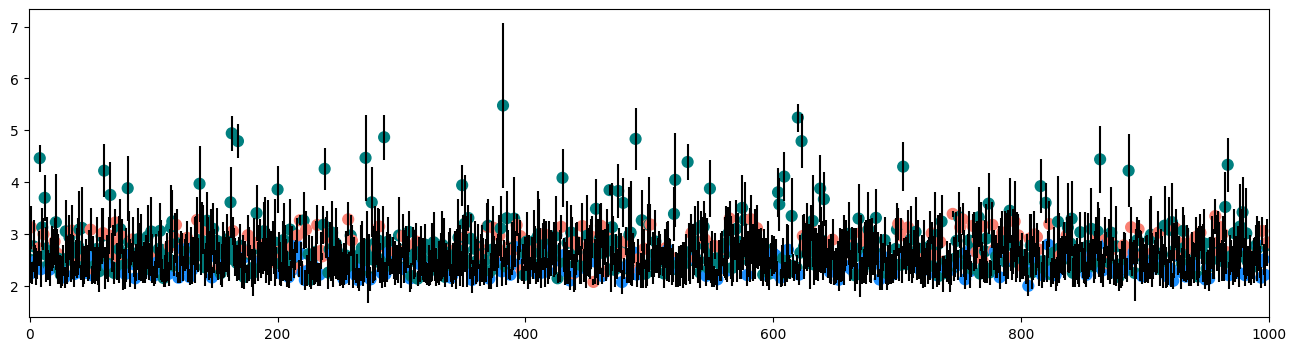

In [13]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

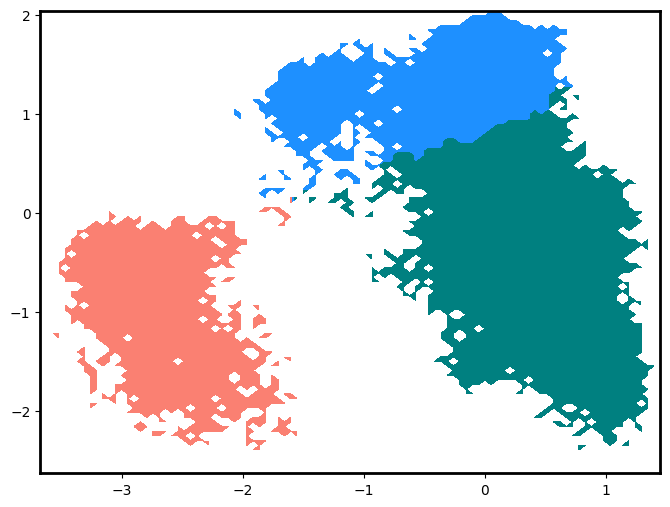

In [14]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=3, cl=350, ml=55, pc=3

In [15]:
i=3
cl = 350
ml = 55
pc = 3

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([  1,   7,  12,  21,  22,  30,  38,  42,  48,  51,  54,  56,  81,
         82,  84,  88,  93, 103, 106, 111, 113, 120, 123, 135, 154, 155,
        156, 159, 162, 170, 177, 178, 180, 190, 203, 210, 214, 228, 232,
        234, 236, 242, 249, 250, 254, 259, 266, 269, 271, 272, 290, 295,
        302, 304, 313, 315, 316, 317, 321, 327, 332, 334, 343, 345, 348]),
 array([  4,   5,   8,  14,  16,  17,  19,  23,  27,  28,  29,  31,  34,
         44,  49,  53,  58,  60,  65,  67,  69,  71,  72,  77,  83,  86,
         87,  94,  98,  99, 101, 105, 114, 115, 118, 121, 126, 129, 131,
        132, 134, 136, 137, 141, 146, 151, 164, 166, 168, 171, 172, 173,
        176, 182, 185, 186, 192, 193, 197, 204, 205, 206, 211, 215, 224,
        226, 229, 237, 241, 247, 248, 251, 258, 264, 265, 267, 280, 285,
        286, 287, 288, 292, 294, 296, 298, 299, 303, 307, 309, 311, 323,
        325, 331, 336, 339, 341, 342]),
 array([  0,   2,   3,   6,   9,  10,  11,  13,  15,  18,  20,  24,  25,
         

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.73it/s]


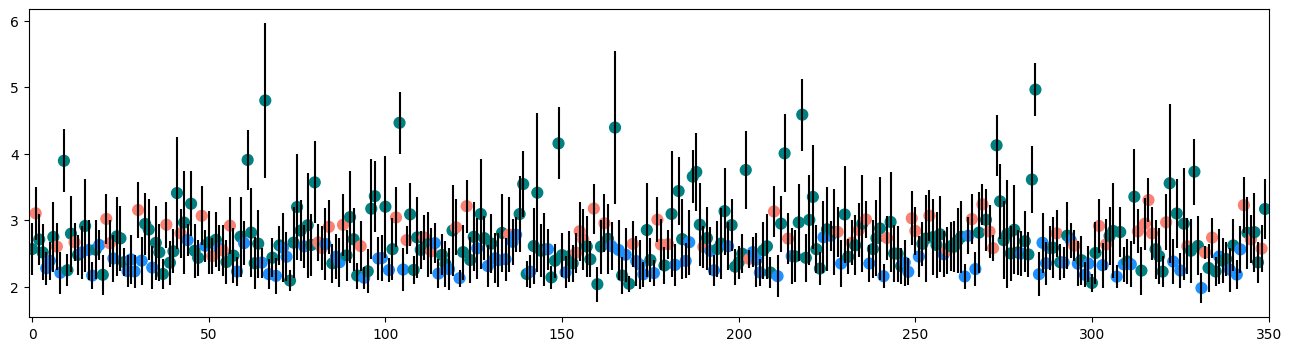

In [16]:
pr = ana.analyze_msm_clusters([dtrj])
pr.take_data([idata1])
means, stds, probs = pr.get_mean()

mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.set_xlim(-1,cl)
plt.show()

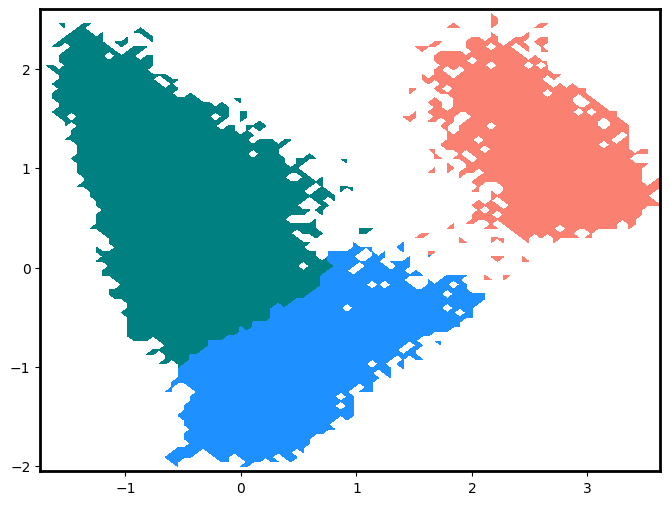

In [17]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

## i=0, cl=50, ml=40, pc=3

In [18]:
i=0
cl = 50
ml = 40
pc = 3

tic2 = np.load(f'ticas/utic2_{i}.npy')

dtrj = np.load(f'urf/saved_msm3/dtraj_{i}_{cl}.npy')

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([ 1,  6,  9, 11, 19, 31, 34, 35, 46, 49]),
 array([ 2,  5,  8, 10, 12, 13, 16, 17, 27, 29, 32, 37, 38, 40, 45]),
 array([ 0,  3,  4,  7, 14, 15, 18, 20, 21, 22, 23, 24, 25, 26, 28, 30, 33,
        36, 39, 41, 42, 43, 44, 47, 48])]

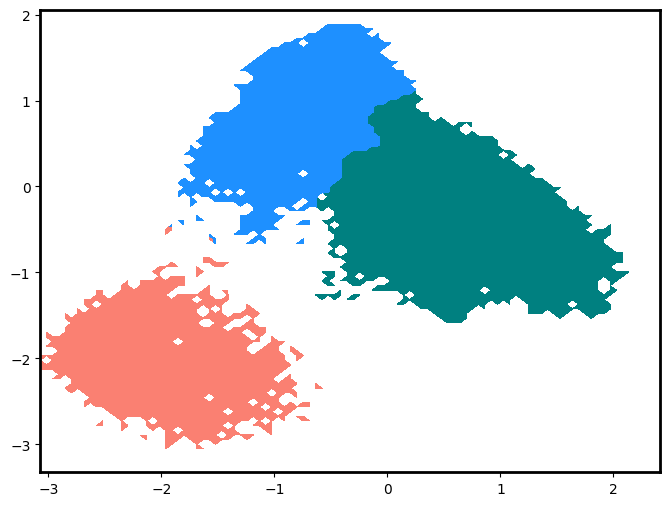

In [19]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-2], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()